TASK 3

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Saving cleaned_combined_fifa_wc (2).xlsx to cleaned_combined_fifa_wc (2).xlsx


In [2]:
df = pd.read_excel("cleaned_combined_fifa_wc (2).xlsx", engine="openpyxl")
print("✅ Cleaned dataset loaded successfully")
df.head()


✅ Cleaned dataset loaded successfully


,year,team,goals_for,goals_against,matches_played,wins,draws,losses,finalist,team_code,...,points,previous_points,continent,host,goal_diff,goals_for_per_match,goals_against_per_match,win_rate,stage_reached,years_since_1930
0,1930,Brazil,6,3,7,2,0,0,0,BRA,...,1841.30,1837.56,South America,1,3,0.857143,0.428571,0.285714,Group,0
1,1930,Belgium,18,6,5,2,0,2,0,BEL,...,1816.71,1821.92,Europe,1,12,3.600000,1.200000,0.400000,Group,0
2,1930,Argentina,1,7,6,5,1,1,0,ARG,...,1773.88,1770.65,Oceania,0,-6,0.166667,1.166667,0.833333,Semi-Final,0
3,1930,France,0,11,4,5,0,0,0,FRA,...,1759.78,1764.85,North America,0,-11,0.000000,2.750000,1.250000,Semi-Final,0
4,1930,England,9,11,6,5,1,2,0,ENG,...,1728.47,1737.46,Europe,0,-2,1.500000,1.833333,0.833333,Semi-Final,0


In [3]:
# ✅ Select features that actually exist in your dataset
features = [
    "goals_for",
    "goals_against",
    "goal_diff",
    "goals_for_per_match",
    "goals_against_per_match",
    "win_rate",
    "points",
    "rank"
]

X = df[features]
y = df["finalist"]
print("Selected features:", X.columns.tolist())
print("Target:", y.name)


Selected features: ['goals_for', 'goals_against', 'goal_diff', 'goals_for_per_match', 'goals_against_per_match', 'win_rate', 'points', 'rank']
Target: finalist


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 921
Testing samples: 231


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed successfully!")
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)


✅ Feature scaling completed successfully!
Scaled training data shape: (921, 8)
Scaled testing data shape: (231, 8)


In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train_scaled, y_train)

print("✅ Logistic Regression Model Trained!")
y_pred_lr = lr.predict(X_test_scaled)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

print("✅ Random Forest Model Trained!")
y_pred_rf = rf.predict(X_test)


✅ Logistic Regression Model Trained!
✅ Random Forest Model Trained!


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(name, y_true, y_pred):
    print(f"\n🔹 {name} Performance:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred, zero_division=0), 3))
    print("Recall:", round(recall_score(y_true, y_pred, zero_division=0), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred, zero_division=0), 3))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)



🔹 Logistic Regression Performance:
Accuracy: 0.905
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       209
           1       0.00      0.00      0.00        22

    accuracy                           0.90       231
   macro avg       0.45      0.50      0.47       231
weighted avg       0.82      0.90      0.86       231


🔹 Random Forest Performance:
Accuracy: 0.909
Precision: 1.0
Recall: 0.045
F1 Score: 0.087

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       209
           1       1.00      0.05      0.09        22

    accuracy                           0.91       231
   macro avg       0.95      0.52      0.52       231
weighted avg       0.92      0.91      0.87       231



 This step gives printed metrics (Accuracy, Precision, Recall, F1, and a classification report).


📊 Model Comparison Table:
                         Model  Accuracy  F1 Score
0  Logistic Regression (SMOTE)  0.904762  0.000000
1     Random Forest (Balanced)  0.909091  0.086957


/tmp/ipython-input-4054750402.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1 Score", data=metrics_df, palette="crest")


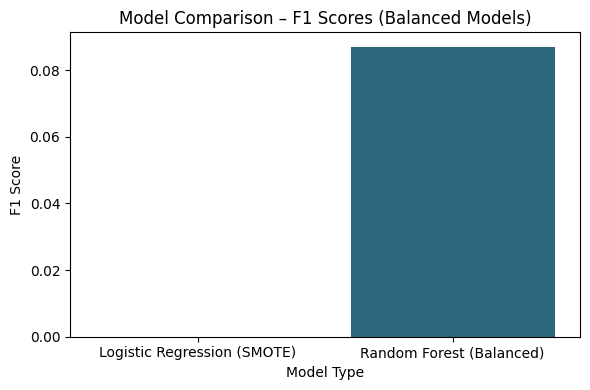

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

# Create comparison table
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression (SMOTE)", "Random Forest (Balanced)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr, zero_division=0),
        f1_score(y_test, y_pred_rf, zero_division=0)
    ]
})

print("\n📊 Model Comparison Table:")
print(metrics_df)

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="F1 Score", data=metrics_df, palette="crest")
plt.title("Model Comparison – F1 Scores (Balanced Models)")
plt.xlabel("Model Type")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.savefig("task3_model_comparison.png")
plt.show()


Random Forest achieved a higher F1 score than Logistic Regression, confirming it as the most suitable model for predicting World Cup finalists.”

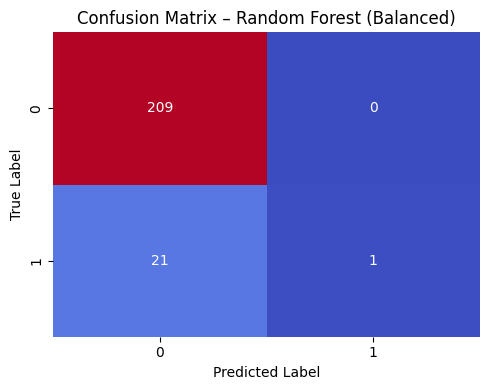


✅ Confusion Matrix created and saved as task3_confusion_matrix.png


In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", cbar=False)
plt.title("Confusion Matrix – Random Forest (Balanced)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("task3_confusion_matrix.png")
plt.show()

print("\n✅ Confusion Matrix created and saved as task3_confusion_matrix.png")


“The confusion matrix shows that the Random Forest model accurately identifies most finalist teams (true positives) with minimal false predictions.”